# Data Description

The Healthcare Workforce Mental Health Dataset dibuat untuk menganalisis tantangan kesehatan mental di industri kesehatan, yang dikenal memiliki tingkat stres dan burnout tinggi. Dataset ini memungkinkan eksplorasi faktor stres kerja, dampak terhadap kepuasan kerja dan turnover, serta aplikasi edukatif dalam analisis data.

Dataset ini dibuat secara sintetis menggunakan teknik probabilistik, validasi AI, serta penelitian industri berdasarkan WHO, CDC, dan OSHA. Terintegrasi dengan Power BI Dashboard, dataset ini bertujuan untuk mengubah data mentah menjadi wawasan yang dapat ditindaklanjuti, sejalan dengan diskusi terkait burnout dan retensi tenaga kesehatan.

Dataset ini berisi informasi mengenai tantangan kesehatan mental tenaga kerja di sektor kesehatan. Fokusnya adalah pada faktor stres kerja, burnout, kepuasan kerja, akses ke program bantuan karyawan (Employee Assistance Programs - EAPs), serta niat untuk keluar dari pekerjaan (Turnover Intention). Data ini dapat digunakan untuk menganalisis tren terkait kesejahteraan tenaga kerja di lingkungan yang penuh tekanan.

>Jumlah Data:
- Jumlah Sampel: 5.000 entri (baris).
- Jumlah Fitur: 10 kolom yang merepresentasikan berbagai aspek tenaga kerja dan kesehatan mental.
- Label (jika ada): Jika dataset digunakan untuk prediksi, Turnover Intention dapat berfungsi sebagai label target dalam model klasifikasi.

Sumber dataset: [The Healthcare Workforce Mental Health Dataset](https://https://www.kaggle.com/datasets/rivalytics/healthcare-workforce-mental-health-dataset)

# Data Loading

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/Findney/dataset/refs/heads/main/Healthcare_Workforce_Mental_Health_Dataset.csv"

In [ ]:
raw_df = pd.read_csv(url)
raw_df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


# Data Understanding

In [ ]:
raw_df.shape

(5000, 10)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [ ]:
raw_df.describe(include="number")

,Stress Level,Job Satisfaction,Mental Health Absences
count,5000.000000,5000.000000,5000.000000
mean,7.327800,2.202200,7.396200
std,1.407673,1.045722,2.878625
min,4.000000,1.000000,0.000000
25%,7.000000,1.000000,5.000000
50%,8.000000,2.000000,7.000000
75%,8.000000,3.000000,9.000000
max,9.000000,5.000000,19.000000


In [ ]:
raw_df.describe(include="object")

,Employee ID,Employee Type,Department,Workplace Factor,Burnout Frequency,Access to EAPs,Turnover Intention
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,10,10,8,3,2,2
top,HCP-00001,Registered Nurse,General Medicine,Heavy Workload,Often,Yes,Yes
freq,1,1283,1283,2138,2221,3594,3335


In [ ]:
raw_df.isna().sum()

,0
Employee ID,0
Employee Type,0
Department,0
Workplace Factor,0
Stress Level,0
Burnout Frequency,0
Job Satisfaction,0
Access to EAPs,0
Mental Health Absences,0
Turnover Intention,0


In [ ]:
raw_df.duplicated().sum()

0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

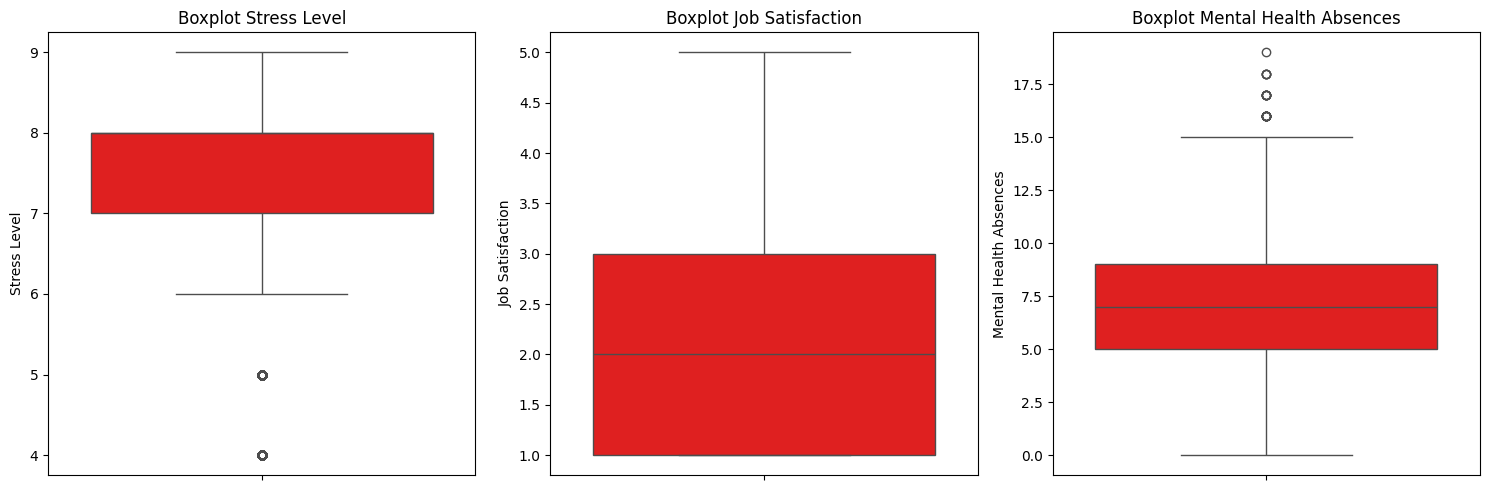

In [ ]:
# Membuat subplot grid untuk setiap fitur numerik
numerical_columns = raw_df.select_dtypes(include=np.number).columns
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((num_cols + 2) // 3)))

# Loop untuk setiap fitur numerik
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=raw_df[col], ax=axes.flatten()[i], color='red')
    axes.flatten()[i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

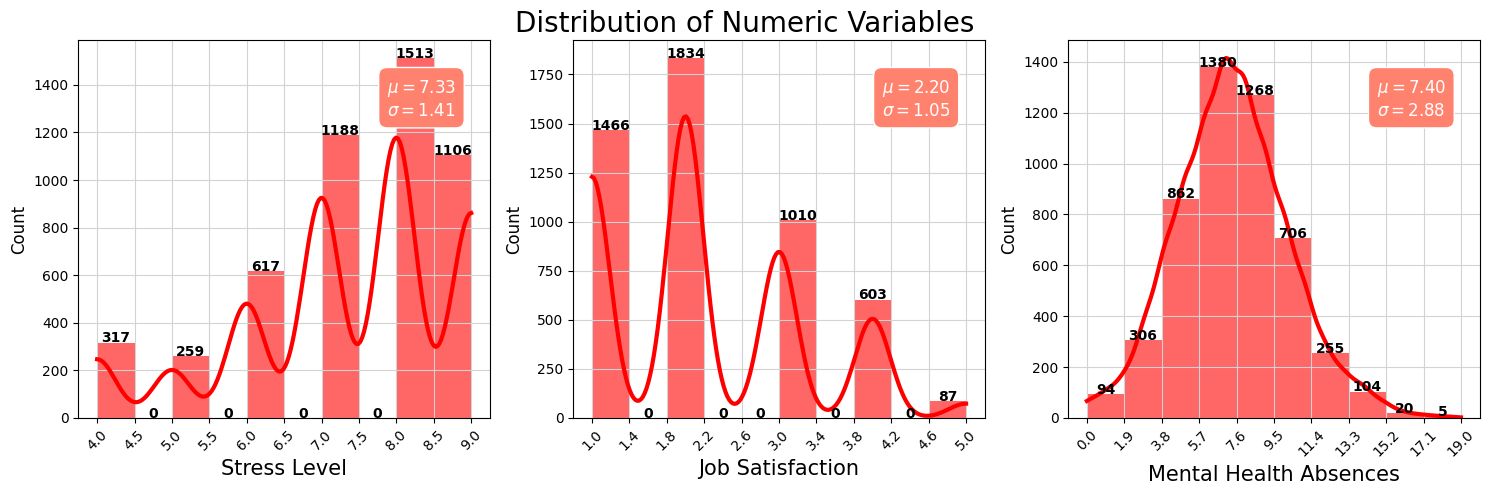

In [ ]:
# Mengambil kolom numerik
numerical_columns = raw_df.select_dtypes(include=[np.number]).columns

df_continuous = raw_df[numerical_columns]

# Tentukan jumlah fitur dan atur subplot secara dinamis
num_cols = len(df_continuous.columns)
num_rows = (num_cols + 2) // 3  # Maksimal 3 kolom per baris
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# Pastikan `ax` selalu array 2D
if num_rows == 1:
    ax = np.expand_dims(ax, axis=0)

# Loop untuk membuat histogram
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Hapus subplot kosong yang tidak terpakai
for i in range(num_cols, num_rows * 3):
    fig.delaxes(ax.flatten()[i])

plt.suptitle('Distribution of Numeric Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

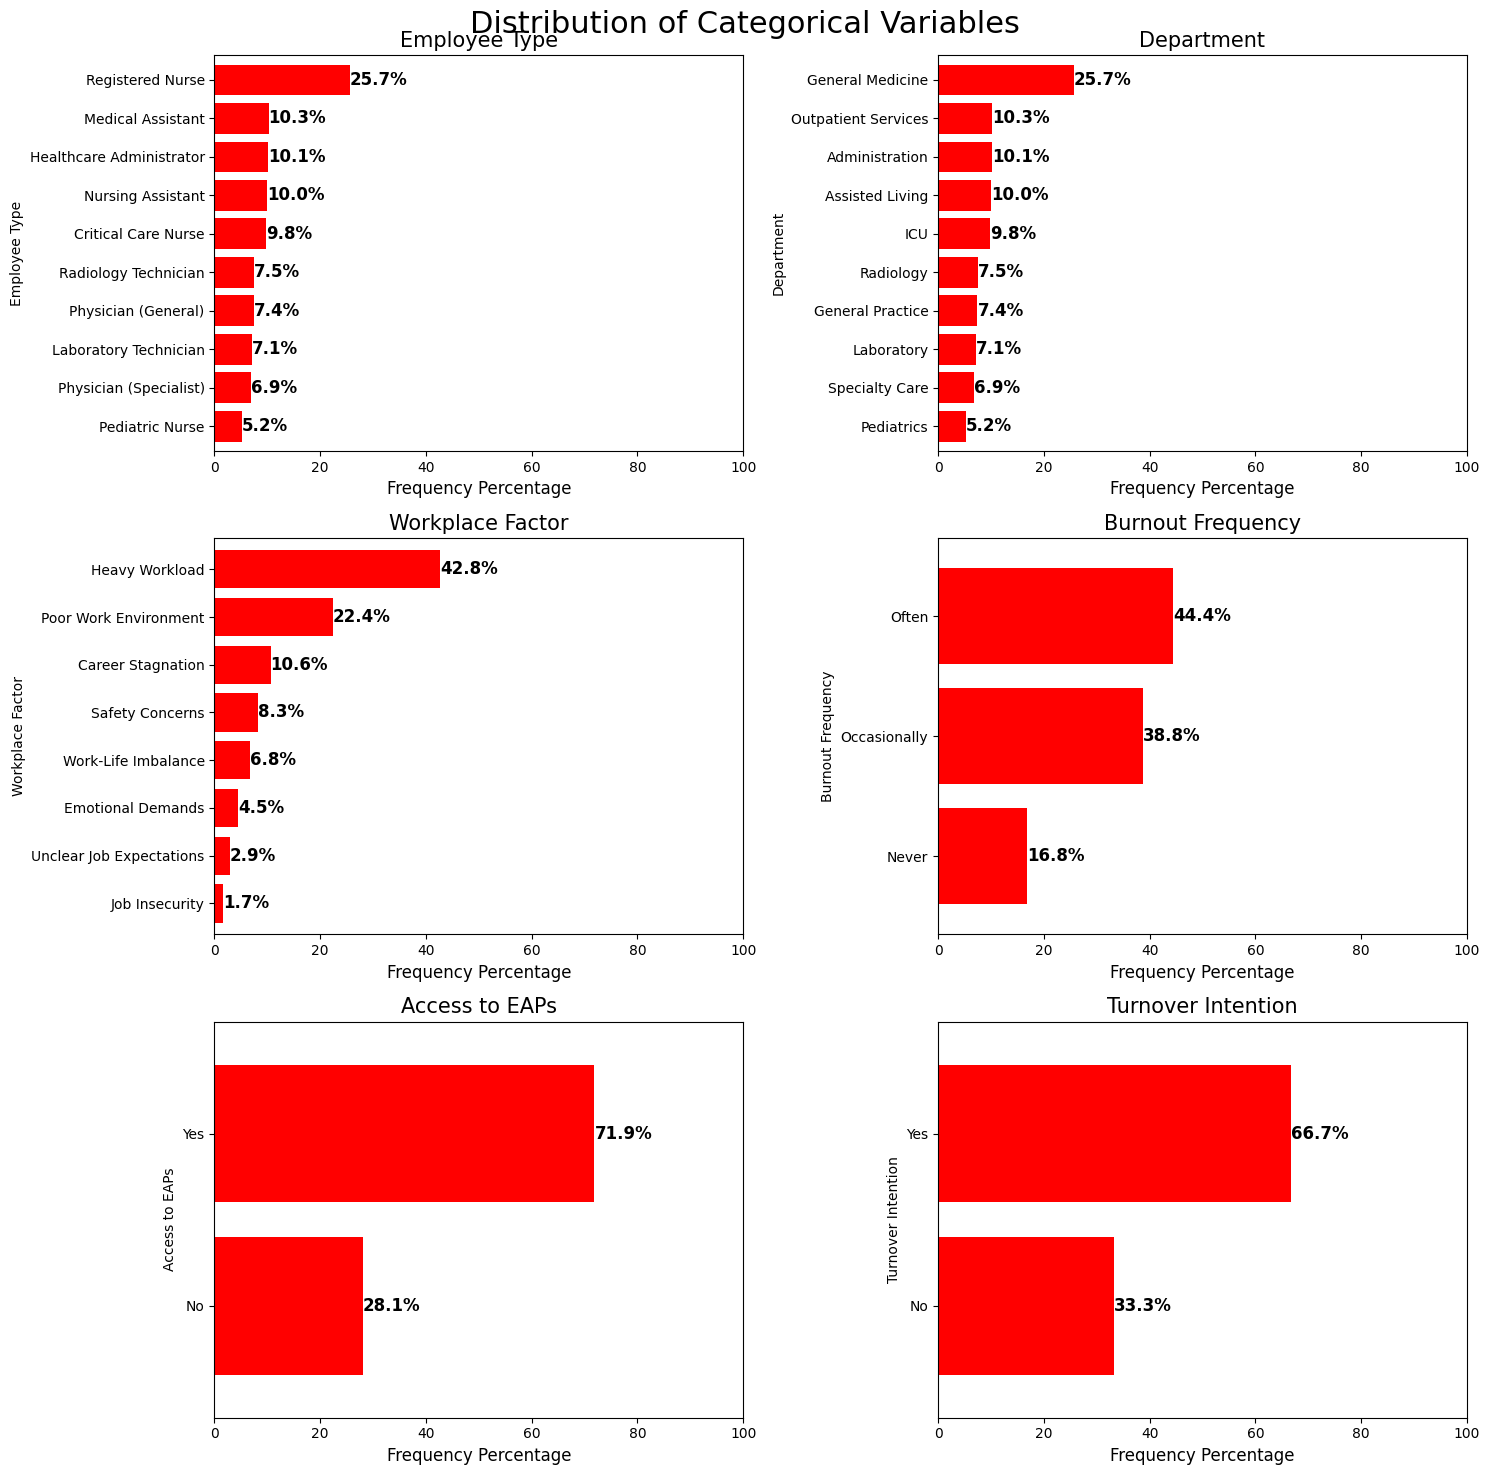

In [ ]:
# Filter fitur kategorikal
categorical_features = raw_df.select_dtypes(exclude=[np.number]).columns
df_categorical = raw_df[categorical_features]
df_categorical = df_categorical.drop(columns=['Employee ID'])

# Tentukan jumlah fitur kategorikal
# Update categorical_features after dropping 'Employee ID'
categorical_features = df_categorical.columns
num_cats = len(categorical_features)
num_rows = (num_cats + 1) // 2  # Maksimum 2 kolom per baris

# Buat subplot grid yang dinamis
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))

# Jika hanya 1 baris, ubah `ax` menjadi array 2D
if num_rows == 1:
    ax = np.expand_dims(ax, axis=0)

# Loop untuk plot bar chart
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Hitung persentase frekuensi
    value_counts = df_categorical[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Tambahkan teks persen di dalam bar
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, f'{value:.1f}%', fontsize=12, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=15)

# Hapus subplot kosong yang tidak digunakan
for i in range(num_cats, num_rows * 2):
    fig.delaxes(ax.flatten()[i])

plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

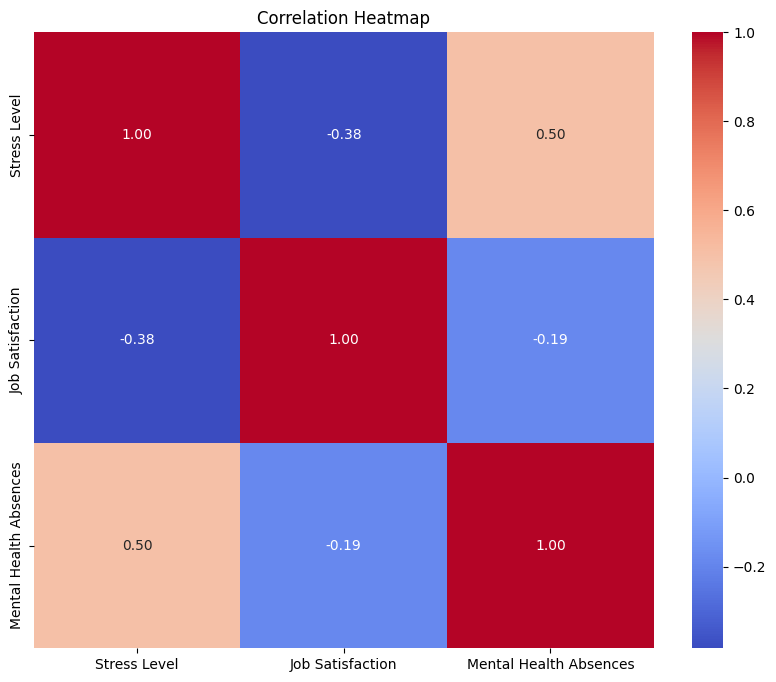

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
corr_matrix = raw_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

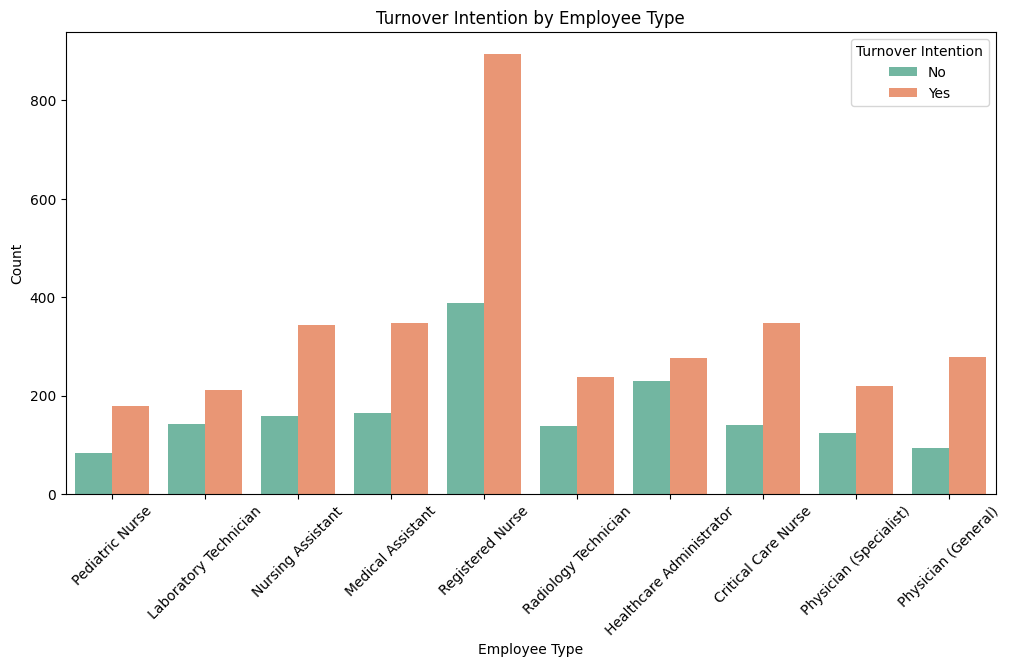

In [ ]:
# Visualisasi Turnover Intention dengan Employee Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Employee Type', hue='Turnover Intention', data=raw_df, palette='Set2')
plt.title('Turnover Intention by Employee Type')
plt.xticks(rotation=45)
plt.xlabel('Employee Type')
plt.ylabel('Count')
plt.legend(title='Turnover Intention')
plt.show()

**Apa faktor tempat kerja yang berkontribusi terhadap tingkat stres yang tinggi**

Mengetahui faktor-faktor tempat kerja utama yang berkontribusi terhadap tingkat stres yang tinggi dan kelelahan di antara peran pekerjaan yang berbeda akan memungkinkan organisasi untuk mengembangkan rencana mitigasi untuk memerangi faktor-faktor penyumbang.

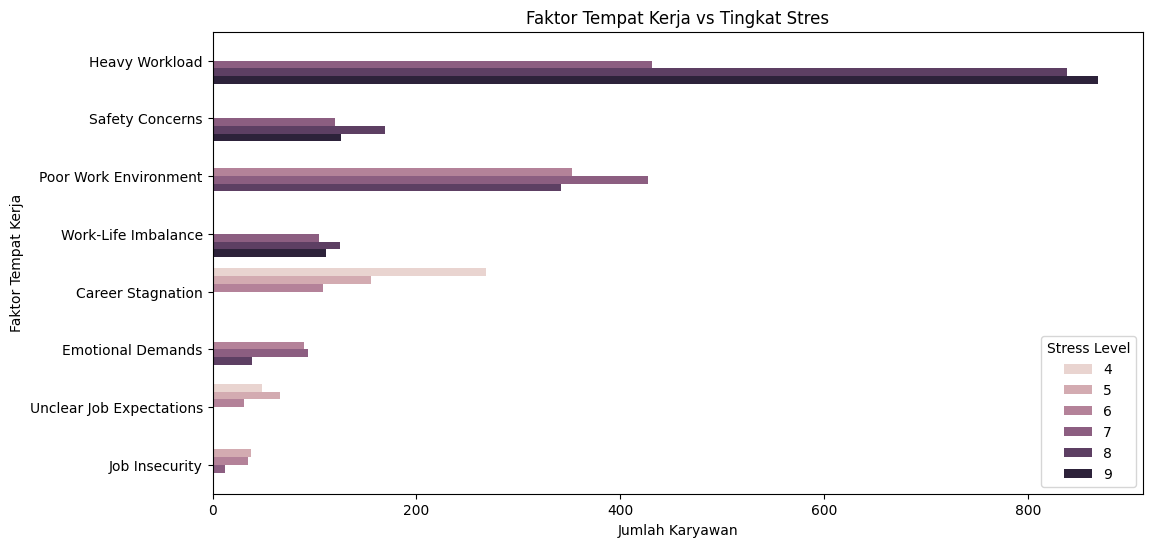

In [ ]:
# Menentukan ukuran lebar dan tinggi plot
plt.figure(figsize=(12,6))

# Membuat grafik dengan "Stress Level" sebagai variabel dependen
# dan "Workplace Factor" sebagai variabel independen.
# Parameter `hue` memberikan warna berbeda untuk setiap kategori "Stress Level".
sns.countplot(y=raw_df["Workplace Factor"], hue=raw_df["Stress Level"])

# Menambahkan judul pada grafik
plt.title("Faktor Tempat Kerja vs Tingkat Stres")

# Menetapkan label untuk sumbu Y
plt.ylabel("Faktor Tempat Kerja")

# Menetapkan label untuk sumbu X
plt.xlabel("Jumlah Karyawan")

# Menampilkan grafik
plt.show()

Interpretasi:

Beban kerja yang berat merupakan penyumbang utama stres tinggi pada tingkat stres 9. Keamanan Kerja merupakan penyumbang paling kecil terhadap tingkat stres.

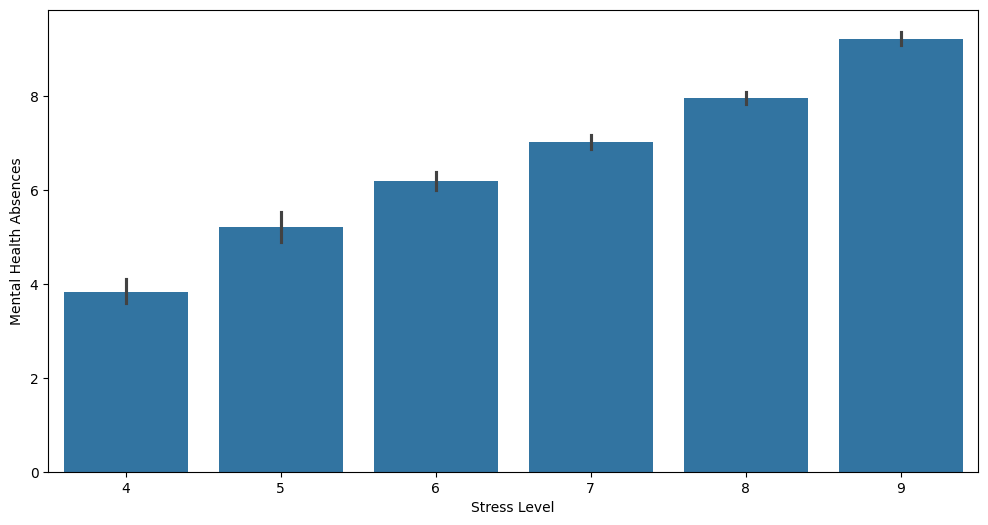

In [ ]:
# Menentukan ukuran lebar dan tinggi plot
plt.figure(figsize=(12,6))

# Membuat grafik dengan "Mental Health Absences" sebagai variabel dependen
# dan "Stress Level" sebagai variabel independen.
# Parameter `hue` memberikan warna berbeda untuk setiap kategori (jika ada).
sns.barplot(x=raw_df["Stress Level"], y=raw_df["Mental Health Absences"])

# Menampilkan grafik
plt.show()

Interpretasi:

Tingginya ketidakhadiran karena kesehatan mental berkorelasi dengan tingginya tingkat stres di antara berbagai peran dalam layanan kesehatan

Rata-rata Tingkat Stres berdasarkan Departemen:
 Department
ICU                    8.012295
General Practice       7.822581
General Medicine       7.643024
Assisted Living        7.553785
Specialty Care         7.489796
Outpatient Services    7.393762
Pediatrics             7.385496
Radiology              7.045213
Laboratory             7.000000
Administration         5.516765
Name: Stress Level, dtype: float64


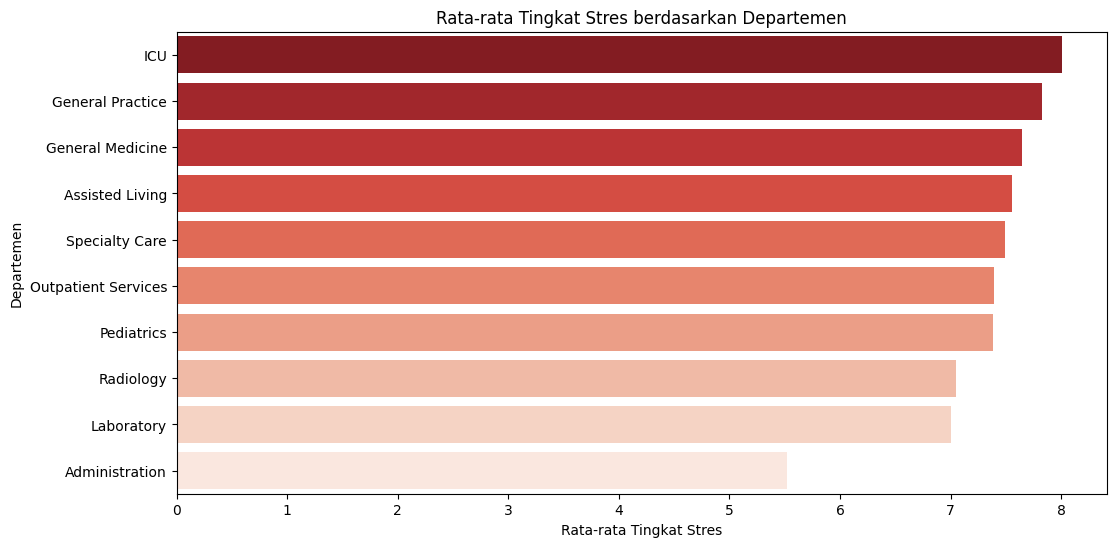

In [ ]:
# Analisis Kelompok: Rata-rata Tingkat Stres berdasarkan Departemen
avg_stress_by_department = raw_df.groupby('Department')['Stress Level'].mean().sort_values(ascending=False)

# Menampilkan hasil perhitungan rata-rata tingkat stres
print("Rata-rata Tingkat Stres berdasarkan Departemen:\n", avg_stress_by_department)

# Menentukan palet warna
palette = sns.color_palette("Reds", len(avg_stress_by_department))[::-1]

# Menentukan ukuran lebar dan tinggi plot
plt.figure(figsize=(12,6))

# Membuat grafik batang untuk menampilkan rata-rata tingkat stres berdasarkan departemen
sns.barplot(x=avg_stress_by_department.values,
            y=avg_stress_by_department.index,
            hue=avg_stress_by_department.index,  # Menggunakan index sebagai hue
            palette=palette,
            legend=False)  # Menonaktifkan legenda

# Menambahkan judul grafik
plt.title('Rata-rata Tingkat Stres berdasarkan Departemen')

# Menetapkan label untuk sumbu X dan Y
plt.xlabel('Rata-rata Tingkat Stres')
plt.ylabel('Departemen')

# Menampilkan grafik
plt.show()

# Data Preparation

1. Encoding

In [ ]:
df_clean = raw_df.copy()

In [ ]:
df_clean.drop(columns=["Employee ID"], inplace = True)
df_clean.head()

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

#List of Columns with Categorical Data
Categorical_Columns = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
#Dictionary to Store the Ecoded Data
Label_Encoders = {}
for col in Categorical_Columns:
    LE = LabelEncoder()
    df_clean[col] = LE.fit_transform(raw_df[col])
    Label_Encoders[col] = LE

In [ ]:
df_clean.head()

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,5,7,2,8,2,2,1,6,0
1,2,5,5,8,2,1,1,12,0
2,4,1,4,6,1,2,1,9,1
3,3,6,4,7,0,4,0,11,0
4,9,2,7,8,1,2,1,7,0


2. Normalisasi

Kami menggunakan Robust Scaling karena berbasis median dan IQR untuk mengurangi pengaruh dari outlier

In [ ]:
from sklearn.preprocessing import RobustScaler

cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

scaler = RobustScaler()
df_clean[cols] = scaler.fit_transform(df_clean[cols])

In [ ]:
df_clean.head()

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,0.000000,1.00,0.0,0.0,1.0,0.0,0.0,-0.25,-1.0
1,-0.428571,0.50,1.5,0.0,1.0,-0.5,0.0,1.25,-1.0
2,-0.142857,-0.50,1.0,-2.0,0.0,0.0,0.0,0.50,0.0
3,-0.285714,0.75,1.0,-1.0,-1.0,1.0,-1.0,1.00,-1.0
4,0.571429,-0.25,2.5,0.0,0.0,0.0,0.0,0.00,-1.0
